In [1]:
import pandas as pd

dev = True  # Set to false when using production version of library
if dev:
    # Path to Dev version of autots library
    sys.path.append(os.environ['DEV_AUTOTS'])
    %load_ext autoreload
    %autoreload 2

from auto_ts import auto_timeseries as ATS

Imported auto_timeseries version:0.0.25. Call by using:

ats = auto_timeseries(score_type='rmse', forecast_period=forecast_period,
                time_interval='Month',
                non_seasonal_pdq=None, seasonality=False, seasonal_period=12,
                model_type=['Prophet'],
                verbose=2)
ats.fit(traindata, ts_column,target)
ats.predict(testdata, forecast_period)



# Load Dataset

In [2]:
file_path="https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
dataset = pd.read_csv(file_path, engine='python')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       144 non-null    object
 1   Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [3]:
dataset.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


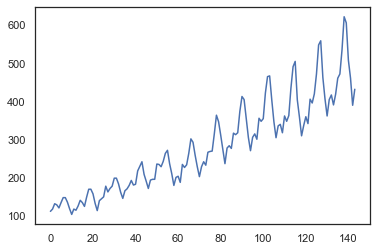

In [4]:
dataset['Passengers'].plot()

# Train Model

In [5]:
ts_column = 'Month'
target = 'Passengers'
sep = ','

In [6]:
FORECAST_PERIOD = 12

In [7]:
automl_model = ATS(
    score_type='rmse',
    forecast_period=FORECAST_PERIOD, time_interval='Month',
    model_type='best', verbose=0
)
        

In [8]:
automl_model.fit(
    traindata=dataset,
    # traindata=file_path,  # Alternately, you can specify the file directly
    ts_column=ts_column,
    target=target,
    cv=3,
    sep=sep)        

Start of Fit.....
    Target variable = Passengers
Start of loading of data.....
Input is data frame. Performing Time Series Analysis
ts_column: Month sep: , target: Passengers
    Dataframe loaded successfully. Shape of data set = (144, 1)
Time Interval is given as Month


Building Prophet Model



Running Facebook Prophet Model...
INFO:numexpr.utils:NumExpr defaulting to 8 threads.
  Starting Prophet Fit
  End of Prophet Fit
  Starting Prophet Cross Validation
  End of Prophet Cross Validation
Num Test Obs Per fold
cutoff
1955-10-04    47
1956-12-12    48
Name: ds, dtype: int64
    RMSE = 37.17
    Std Deviation of Originals = 119.97
    Normalized RMSE = 31%
    RMSE = 43.50
    Std Deviation of Originals = 119.97
    Normalized RMSE = 36%


Building Auto SARIMAX Model



Running Auto SARIMAX Model...
Performing stepwise search to minimize aic
Fit ARIMA(0,1,0)x(0,0,0,0) [intercept=True]; AIC=1415.278, BIC=1421.203, Time=0.022 seconds
Fit ARIMA(1,1,0)x(0,0,0,0) [intercept=True]; AIC=

# Evaluate Results

In [9]:
automl_model.get_leaderboard()

,name,rmse
0,Prophet,40.332305
1,auto_SARIMAX,63.260274
2,VAR,inf
3,ML,inf


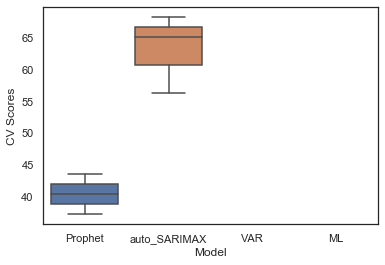

In [10]:
automl_model.plot_cv_scores()

In [11]:
# There is a Bug with Prophet folds: https://github.com/AutoViML/Auto_TS/issues/25
automl_model.get_cv_scores()

,Model,CV Scores
0,Prophet,37.165538
1,Prophet,43.499071
2,auto_SARIMAX,65.201779
3,auto_SARIMAX,68.338652
4,auto_SARIMAX,56.240390
5,VAR,inf
6,ML,inf


In [12]:
results_dict = automl_model.get_ml_dict()

In [13]:
results_dict['Prophet']['forecast']  

[           ds        yhat  yhat_lower  yhat_upper    y     cutoff
 0  1955-11-01  253.831790  231.900960  274.567550  237 1955-10-04
 1  1955-12-01  279.424803  257.790886  300.183974  278 1955-10-04
 2  1956-01-01  285.454862  263.396323  306.540286  284 1955-10-04
 3  1956-02-01  289.307225  266.332808  310.081953  277 1955-10-04
 4  1956-03-01  315.258709  294.090917  335.064186  317 1955-10-04
 5  1956-04-01  312.122960  289.700351  333.641675  313 1955-10-04
 6  1956-05-01  310.369620  288.257945  331.709229  318 1955-10-04
 7  1956-06-01  336.901897  317.144813  358.151785  374 1955-10-04
 8  1956-07-01  349.303648  326.484327  370.182649  413 1955-10-04
 9  1956-08-01  360.857189  339.736802  383.321090  405 1955-10-04
 10 1956-09-01  332.906045  312.146277  354.833810  355 1955-10-04
 11 1956-10-01  314.391164  293.713064  335.168369  306 1955-10-04
 12 1956-11-01  291.166761  268.769062  312.790105  271 1955-10-04
 13 1956-12-01  309.982443  287.994737  333.384375  306 1955-1

In [14]:
results_dict['auto_SARIMAX']['forecast'] 

[Passengers        mean    mean_se  mean_ci_lower  mean_ci_upper
 1958-01-01  351.073484  21.897605     308.154968     393.992000
 1958-02-01  379.190985  28.145697     324.026432     434.355537
 1958-03-01  412.542040  30.104171     353.538949     471.545130
 1958-04-01  442.522591  30.264167     383.205913     501.839270
 1958-05-01  462.230926  30.398074     402.651796     521.810056
 1958-06-01  468.268249  30.919019     407.668086     528.868412
 1958-07-01  461.395801  31.286069     400.076233     522.715369
 1958-08-01  445.961640  31.296103     384.622405     507.300875
 1958-09-01  428.364819  31.679200     366.274728     490.454910
 1958-10-01  415.073232  33.398697     349.612988     480.533477
 1958-11-01  410.792825  36.454859     339.342615     482.243035
 1958-12-01  417.291666  39.816746     339.252278     495.331053,
 Passengers        mean    mean_se  mean_ci_lower  mean_ci_upper
 1959-01-01  375.530681  26.415898     323.756471     427.304891
 1959-02-01  421.765277 

# Forecast Results

In [15]:
# Using Best Model
future_predictions = automl_model.predict(
    forecast_period=FORECAST_PERIOD
)  
future_predictions

Building Forecast dataframe. Forecast Period = 12


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
144,1960-12-31,487.426617,416.745308,502.911859,487.412421,487.446491,-25.356311,-25.356311,-25.356311,-25.356311,-25.356311,-25.356311,0.0,0.0,0.0,462.070306
145,1961-01-31,490.540856,409.040572,494.673627,490.466383,490.609907,-35.768511,-35.768511,-35.768511,-35.768511,-35.768511,-35.768511,0.0,0.0,0.0,454.772345
146,1961-02-28,493.353718,457.783585,541.191090,493.216067,493.492682,4.323732,4.323732,4.323732,4.323732,4.323732,4.323732,0.0,0.0,0.0,497.677451
147,1961-03-31,496.467958,445.458508,531.369277,496.263083,496.689112,-8.713456,-8.713456,-8.713456,-8.713456,-8.713456,-8.713456,0.0,0.0,0.0,487.754502
148,1961-04-30,499.481739,454.533734,542.975024,499.194227,499.818141,-1.122716,-1.122716,-1.122716,-1.122716,-1.122716,-1.122716,0.0,0.0,0.0,498.359023
149,1961-05-31,502.595979,492.054059,580.889872,502.225981,503.029173,31.500437,31.500437,31.500437,31.500437,31.500437,31.500437,0.0,0.0,0.0,534.096416
150,1961-06-30,505.609760,529.885390,619.340905,505.134261,506.143466,71.465747,71.465747,71.465747,71.465747,71.465747,71.465747,0.0,0.0,0.0,577.075507
151,1961-07-31,508.724000,533.568120,621.541005,508.114142,509.376294,66.764641,66.764641,66.764641,66.764641,66.764641,66.764641,0.0,0.0,0.0,575.488641
152,1961-08-31,511.838239,485.036331,572.484168,511.092306,512.613166,17.165841,17.165841,17.165841,17.165841,17.165841,17.165841,0.0,0.0,0.0,529.004080
153,1961-09-30,514.852020,447.531533,536.888027,513.968475,515.813495,-22.566787,-22.566787,-22.566787,-22.566787,-22.566787,-22.566787,0.0,0.0,0.0,492.285233


In [17]:
# Using specific model
future_predictions = automl_model.predict(
    forecast_period=FORECAST_PERIOD,
    model='auto_SARIMAX'
)
future_predictions

Passengers,mean,mean_se,mean_ci_lower,mean_ci_upper
1961-01-01,481.454539,31.026818,420.643094,542.265985
1961-02-01,521.522038,45.893277,431.572868,611.471208
1961-03-01,542.128408,51.157266,441.862009,642.394806
1961-04-01,544.951697,51.711740,443.598549,646.304844
1961-05-01,537.884866,51.853876,436.253137,639.516596
1961-06-01,529.387351,52.586307,426.320084,632.454619
1961-07-01,524.964862,53.178575,420.736770,629.192954
1961-08-01,526.259519,53.332962,421.728833,630.790204
1961-09-01,532.018425,53.331851,427.489917,636.546932
1961-10-01,539.783685,53.400463,435.120701,644.446668


In [18]:
# Using specific model
future_predictions = automl_model.predict(
    forecast_period=FORECAST_PERIOD,
    model='Prophet',
    simple=False

)
future_predictions

Building Forecast dataframe. Forecast Period = 12


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
144,1960-12-31,487.426617,416.766112,506.367334,487.409723,487.441217,-25.356311,-25.356311,-25.356311,-25.356311,-25.356311,-25.356311,0.0,0.0,0.0,462.070306
145,1961-01-31,490.540856,407.785582,501.310274,490.464935,490.601968,-35.768511,-35.768511,-35.768511,-35.768511,-35.768511,-35.768511,0.0,0.0,0.0,454.772345
146,1961-02-28,493.353718,451.456352,540.878289,493.218960,493.479881,4.323732,4.323732,4.323732,4.323732,4.323732,4.323732,0.0,0.0,0.0,497.677451
147,1961-03-31,496.467958,444.191446,530.299168,496.236981,496.691436,-8.713456,-8.713456,-8.713456,-8.713456,-8.713456,-8.713456,0.0,0.0,0.0,487.754502
148,1961-04-30,499.481739,452.329617,546.391573,499.150586,499.787747,-1.122716,-1.122716,-1.122716,-1.122716,-1.122716,-1.122716,0.0,0.0,0.0,498.359023
149,1961-05-31,502.595979,487.498884,579.765875,502.165607,503.005637,31.500437,31.500437,31.500437,31.500437,31.500437,31.500437,0.0,0.0,0.0,534.096416
150,1961-06-30,505.609760,530.934919,623.111801,505.083220,506.123786,71.465747,71.465747,71.465747,71.465747,71.465747,71.465747,0.0,0.0,0.0,577.075507
151,1961-07-31,508.724000,527.071970,622.287222,508.093556,509.345038,66.764641,66.764641,66.764641,66.764641,66.764641,66.764641,0.0,0.0,0.0,575.488641
152,1961-08-31,511.838239,486.568715,575.386811,511.112320,512.599510,17.165841,17.165841,17.165841,17.165841,17.165841,17.165841,0.0,0.0,0.0,529.004080
153,1961-09-30,514.852020,448.497775,535.800474,513.944887,515.759351,-22.566787,-22.566787,-22.566787,-22.566787,-22.566787,-22.566787,0.0,0.0,0.0,492.285233
